Project Idea: Personalized Learning Recommendation System
What It Does
Builds an intelligent tutor-like system that predicts the best next learning resource (article, problem, or quiz) for a student based on their past performance.
Uses student performance data (scores, time spent, mistakes) to recommend content tailored to their weaknesses.
Could be adapted to math, coding, or any subject dataset.


--- Logistic Regression ---
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


--- Random Forest ---
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



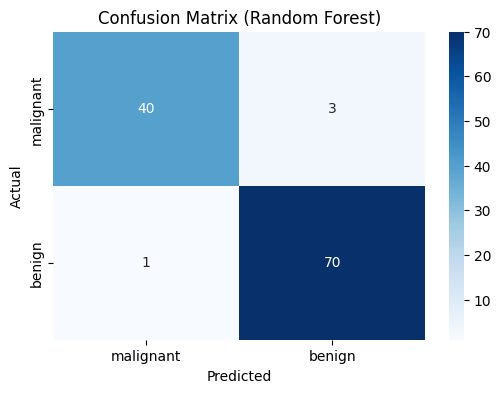

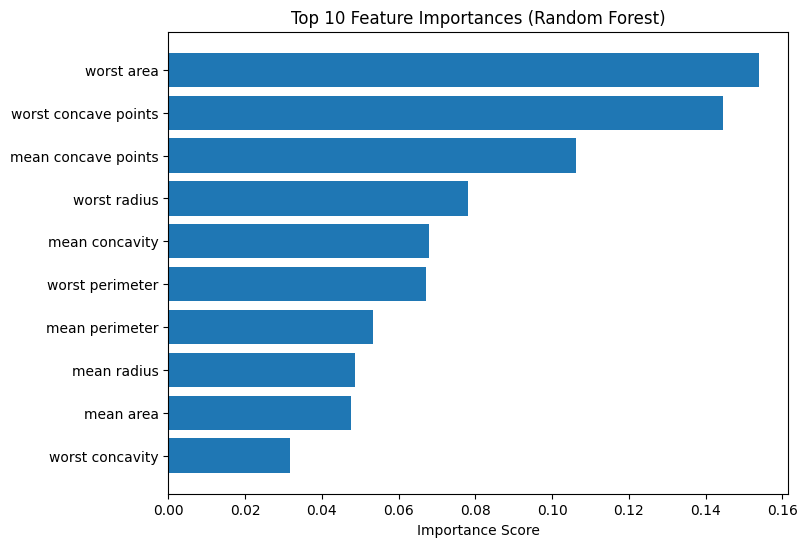

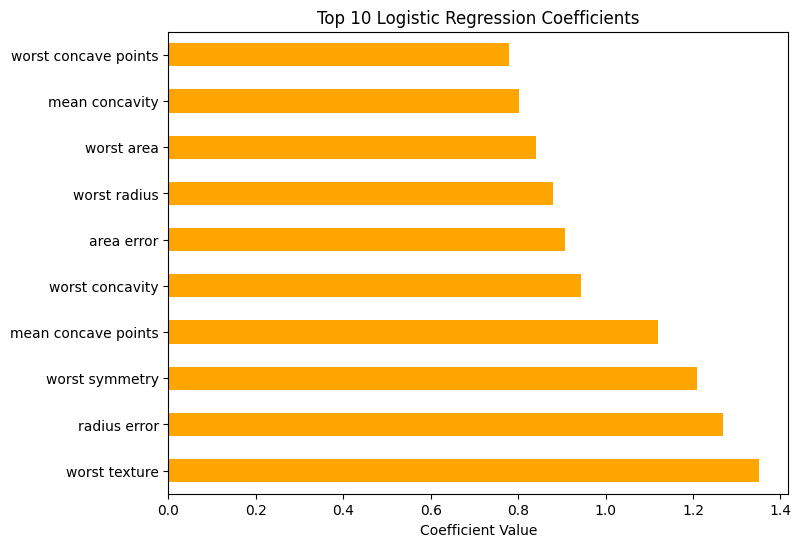

In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target) # 0 = fail, 1 = pass

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train models
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)


# Step 7: Evaluation Reports
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# -----------------------------
# VISUALIZATIONS
# -----------------------------

# 1. Confusion Matrix (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# 3. Logistic Regression Coefficients
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
top_coeff = coefficients.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top_coeff.plot(kind="barh", color="orange")
plt.title("Top 10 Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.show()